In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [15]:
raw_data = pd.read_csv('Dummy linear regression.csv')

In [16]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,No


In [17]:
data = raw_data.copy()

In [18]:
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [19]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,0


In [20]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.202381
std,104.530661,0.271617,0.404188
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,0.000000
max,2050.000000,3.810000,1.000000


## Regression

In [9]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     30.15
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           1.63e-10
Time:                        19:29:50   Log-Likelihood:                 14.165
No. Observations:                  84   AIC:                            -22.33
Df Residuals:                      81   BIC:                            -15.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3015      0.404      0.746      0.458      -0.503       1.106
SAT            0.0016      0.000      7.443      0.000       0.001       0.002
Attendance     0.0970      0.057      1.712      0.091      -0.016       0.210
==============================================================================
Omnibus:                       11.897   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.402
Skew:                          -0.692   Prob(JB):                     0.000746
Kurtosis:                       4.484   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

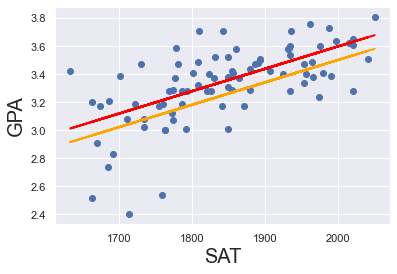

In [21]:
plt.scatter(data['SAT'], y)
yhat_no = 0.3015 + 0.0016*data['SAT']
yhat_yes = 0.3985 + 0.0016*data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw = 2, color = 'Orange')
fig = plt.plot(data['SAT'], yhat_yes, lw = 2, color = 'Red')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

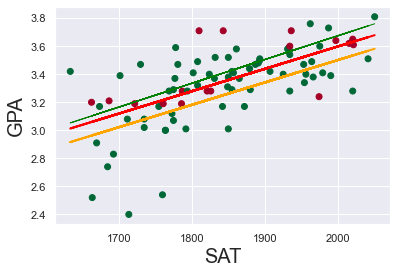

In [22]:
plt.scatter(data['SAT'], y, c = data['Attendance'], cmap = 'RdYlGn_r')
yhat_no = 0.3015 + 0.0016*data['SAT']
yhat_yes = 0.3985 + 0.0016*data['SAT']
yhat = 0.275 + 0.0017*data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw = 2, color = 'Orange', label = 'Regression line 1')
fig = plt.plot(data['SAT'], yhat_yes, lw = 2, color = 'Red', label = 'Regression line 2')
fig = plt.plot(data['SAT'], yhat, lw = 1, color = 'Green', label = 'Regression line 3')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [13]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,0
